# The notebook for Spectrum Analysis on the sample from Norway soil

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl #Some more style nonsense
from scipy.stats import linregress #linear regression
from scipy.optimize import curve_fit

mpl.rcParams['figure.figsize'] = [8.0, 4.5] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=300 # dots per inch

from Spectrav5 import spectra #Main tool

#import data
E,Norway_bf = np.loadtxt("norway_before.csv",delimiter=',',unpack= True,usecols=(0,1))
E,Norway_af = np.loadtxt("norway_after.csv",delimiter=',',unpack= True,usecols=(0,1))
E,Norway_bkg = np.loadtxt("norway_bkgd.csv",delimiter=',',unpack= True,usecols=(0,1))

#Calibration info
cali_info = ([0.677211,0.000001],[0.938472,0.000001]) #(m,c)

#check the shape
print(np.shape(Norway_bf),np.shape(Norway_af),np.shape(Norway_bkg))

(4096,) (4096,) (4096,)


In [2]:
N1 = spectra(Norway_bf,label = "the Norway Soil (Before)",bkg=Norway_bkg)
N2 = spectra(Norway_af,label = "the Norway Soil (After)",bkg=Norway_bkg)

#calibration
N1.get_E_scale(*cali_info)
N2.get_E_scale(*cali_info)

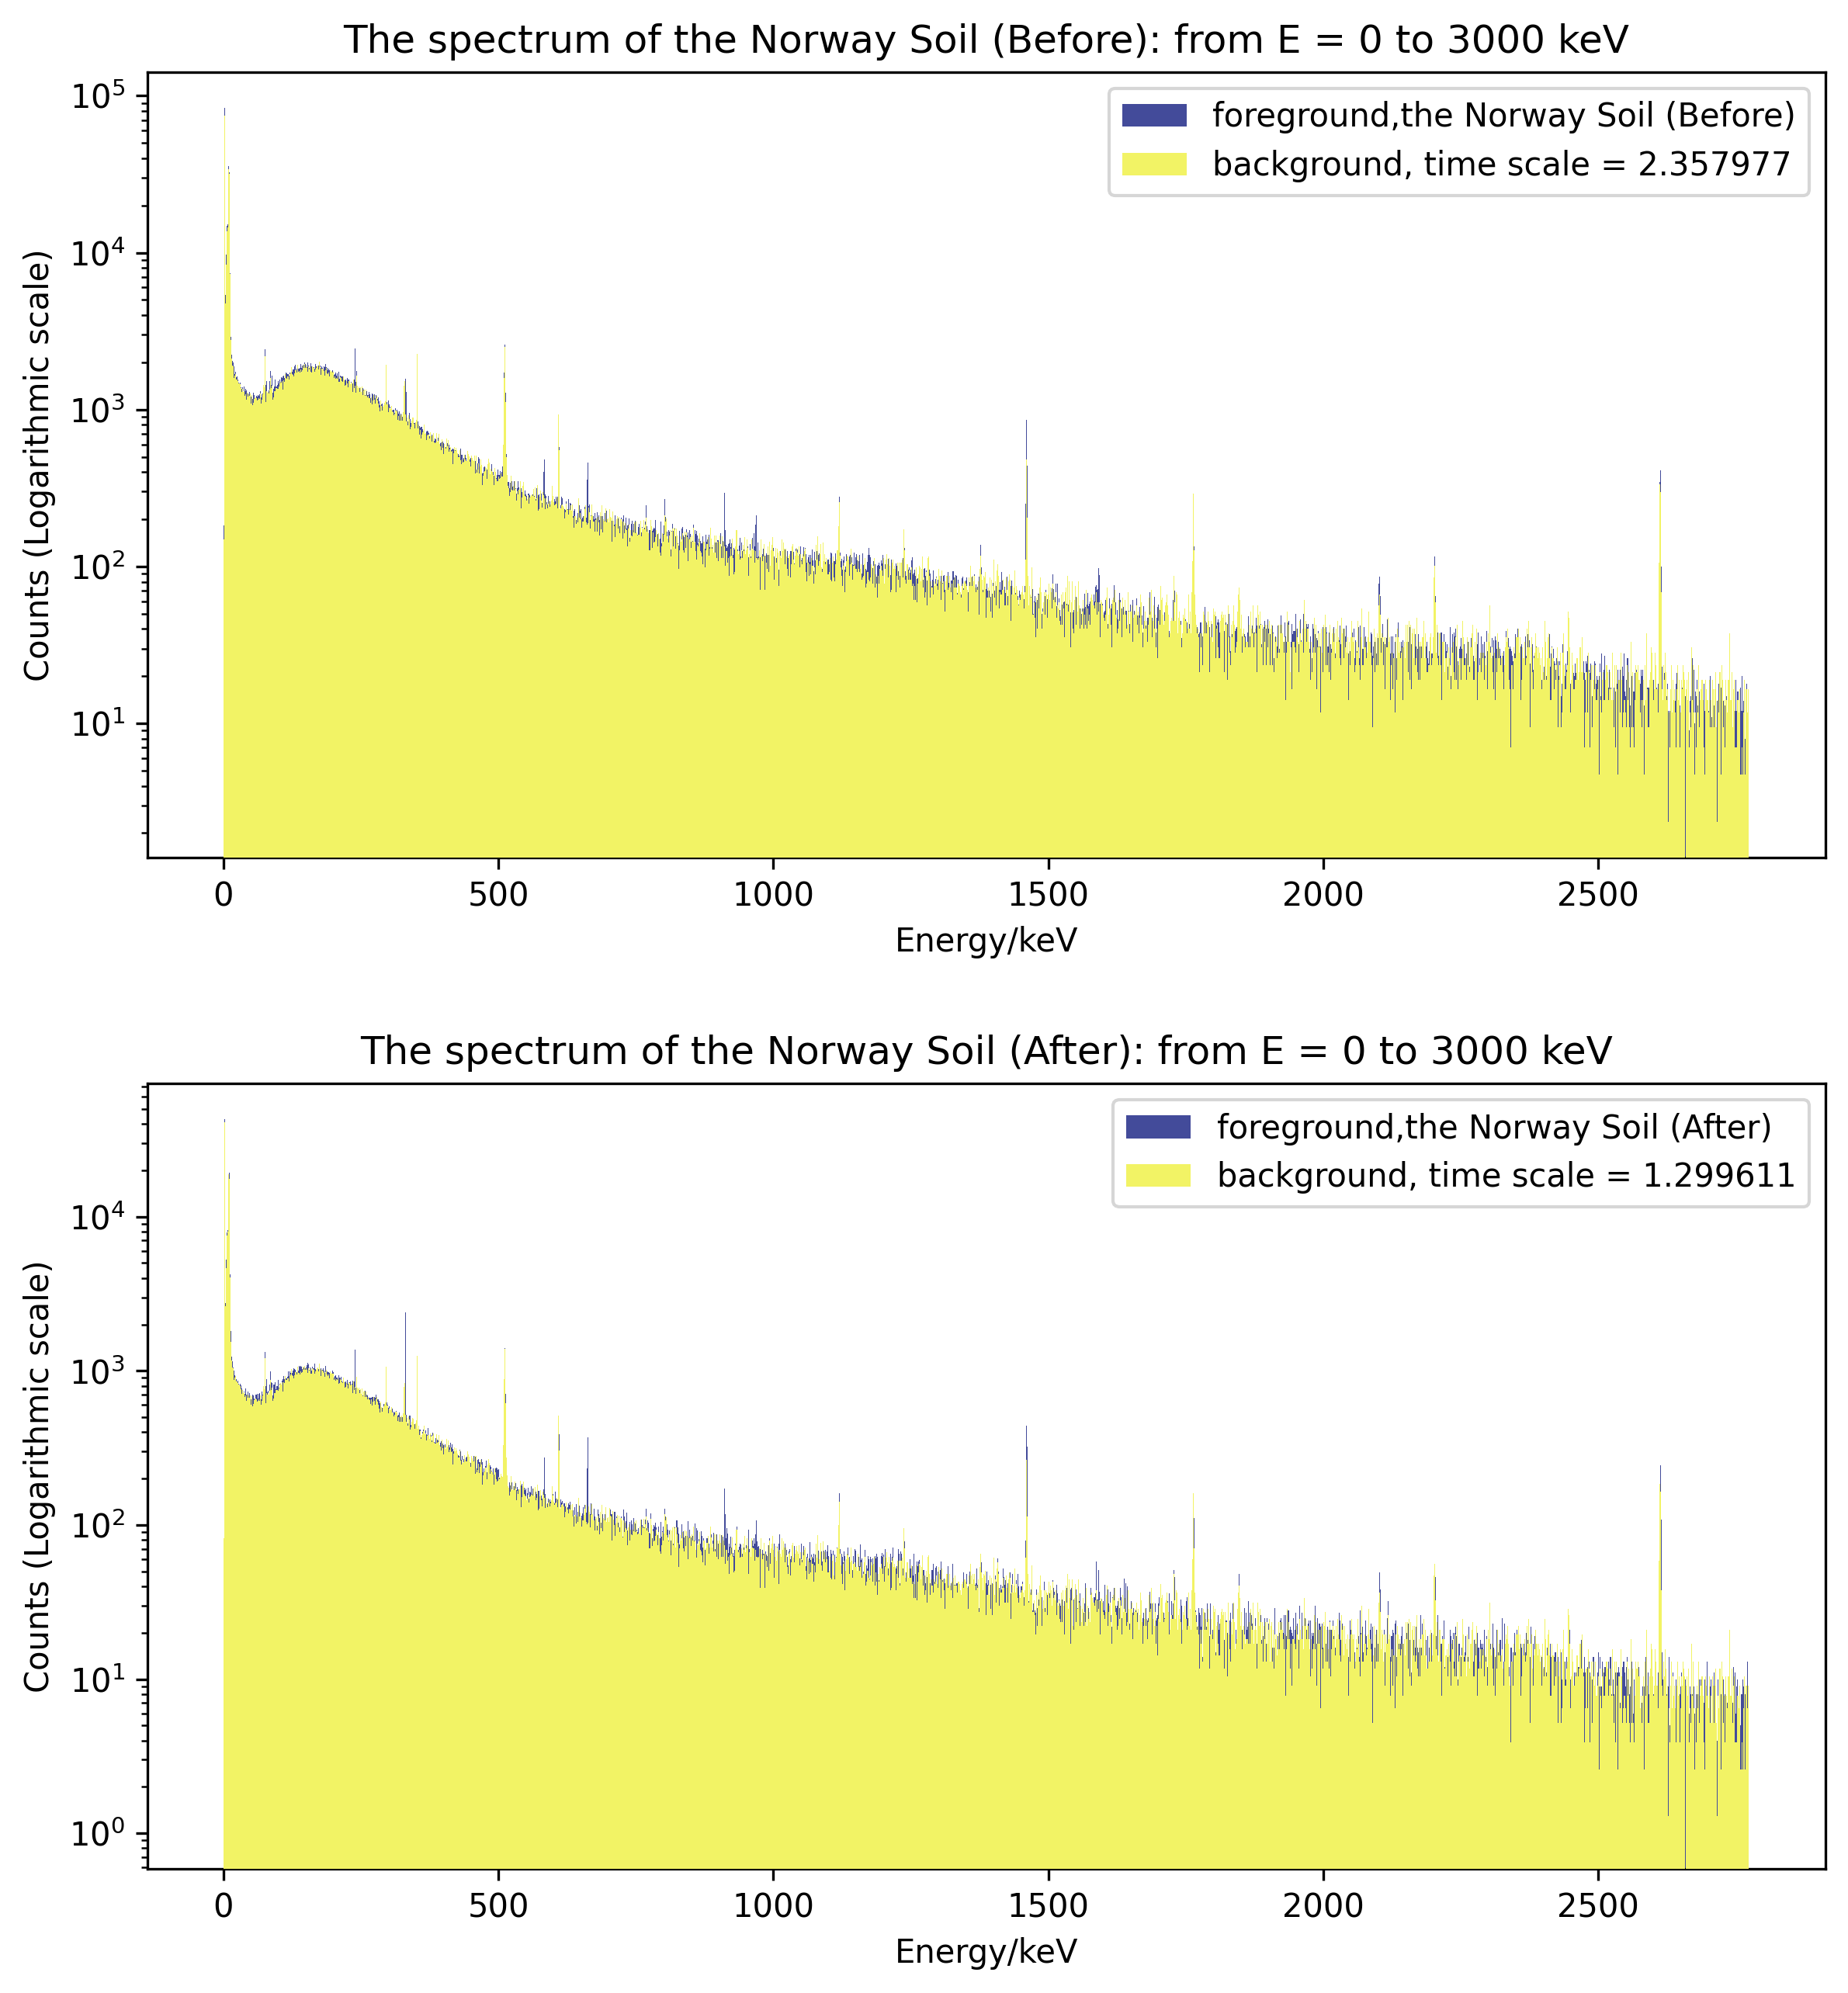

In [3]:
fig,ax = plt.subplots(2)
fig.tight_layout(pad = 1)
fig.set_size_inches(8, 9)

N1.spectra(axs = ax[0],log=True,bkg=True,timescale= 6.06E+05/2.57E+05)#timescale = livetime ratio
N2.spectra(axs = ax[1],log=True,bkg=True,timescale= 3.34E+05/2.57E+05)#timescale = livetime ratio

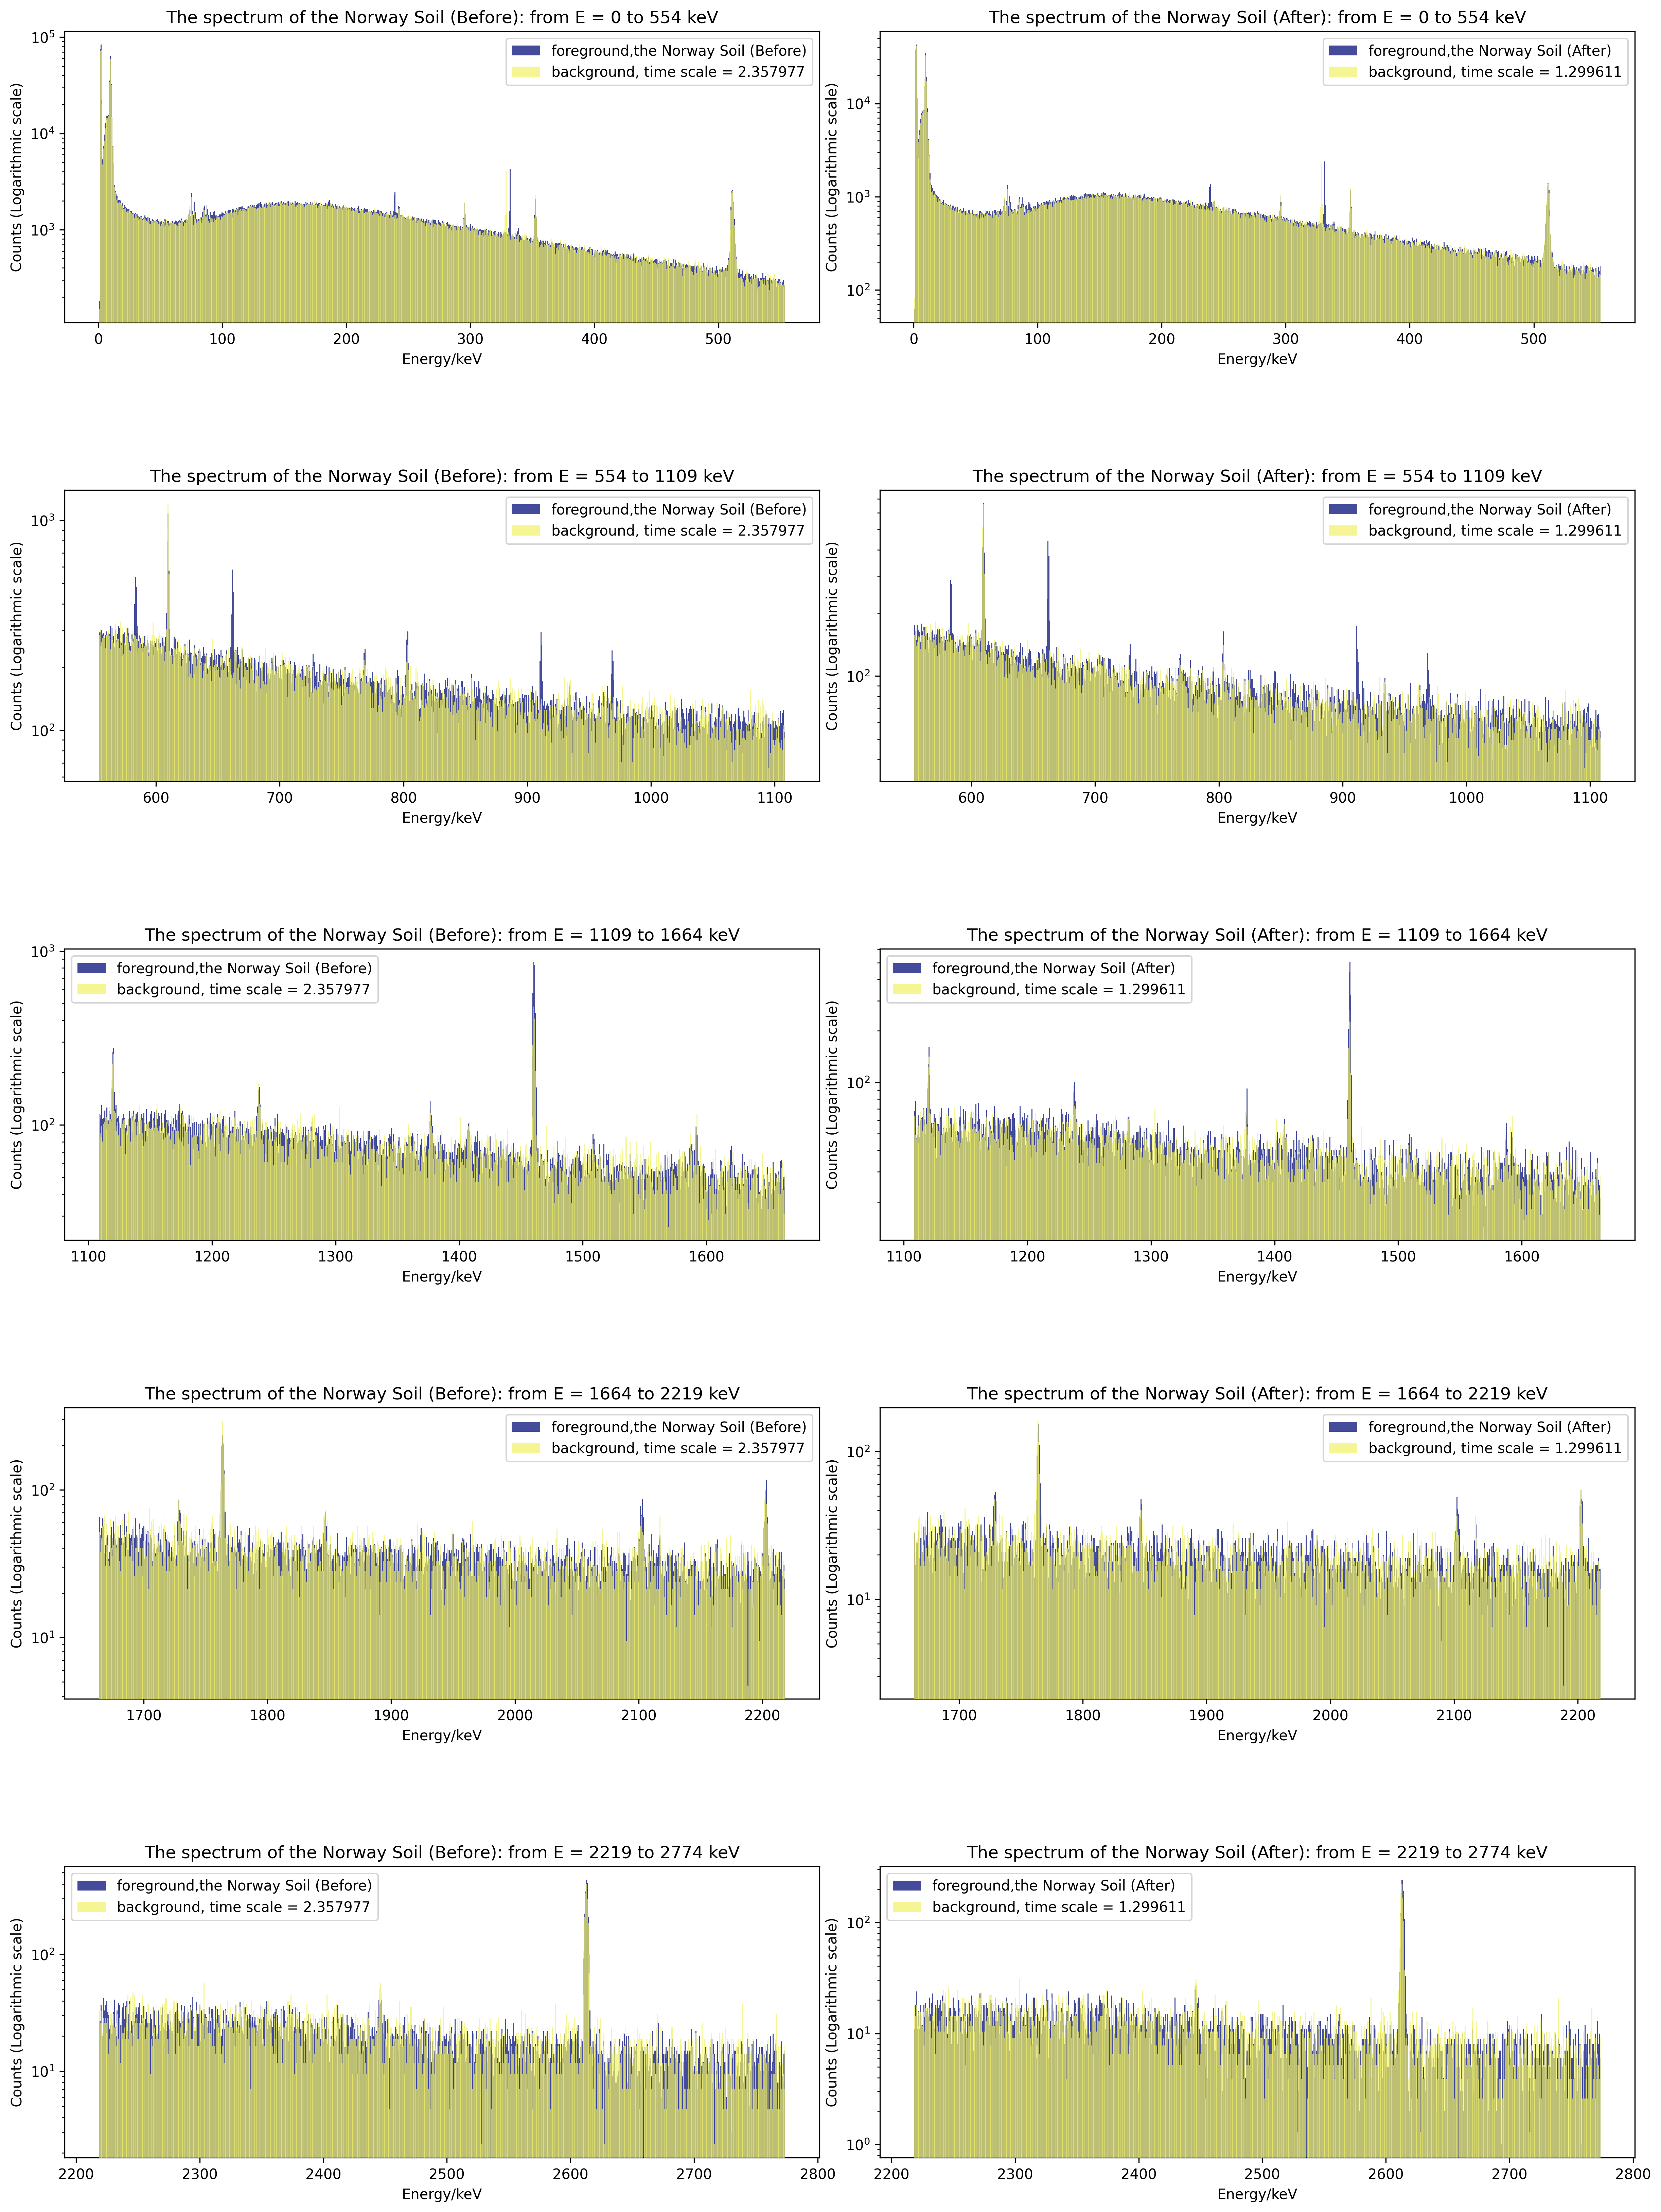

In [4]:
fig,ax = plt.subplots(5,2)
fig.tight_layout(pad = 0)
fig.set_size_inches(16, 22.5)

x = np.linspace(0,2774,6)
for i in range(5):
    N1.spectra(int(x[i]),int(x[i+1]),axs = ax[i,0],log=True,bkg=True,timescale= 6.06E+05/2.57E+05,bkgalpha=0.7)

for i in range(5):
    N2.spectra(int(x[i]),int(x[i+1]),axs = ax[i,1],log=True,bkg=True,timescale= 3.34E+05/2.57E+05,bkgalpha=0.7)

### Close look at photopeaks
Distinguishable peaks from the background

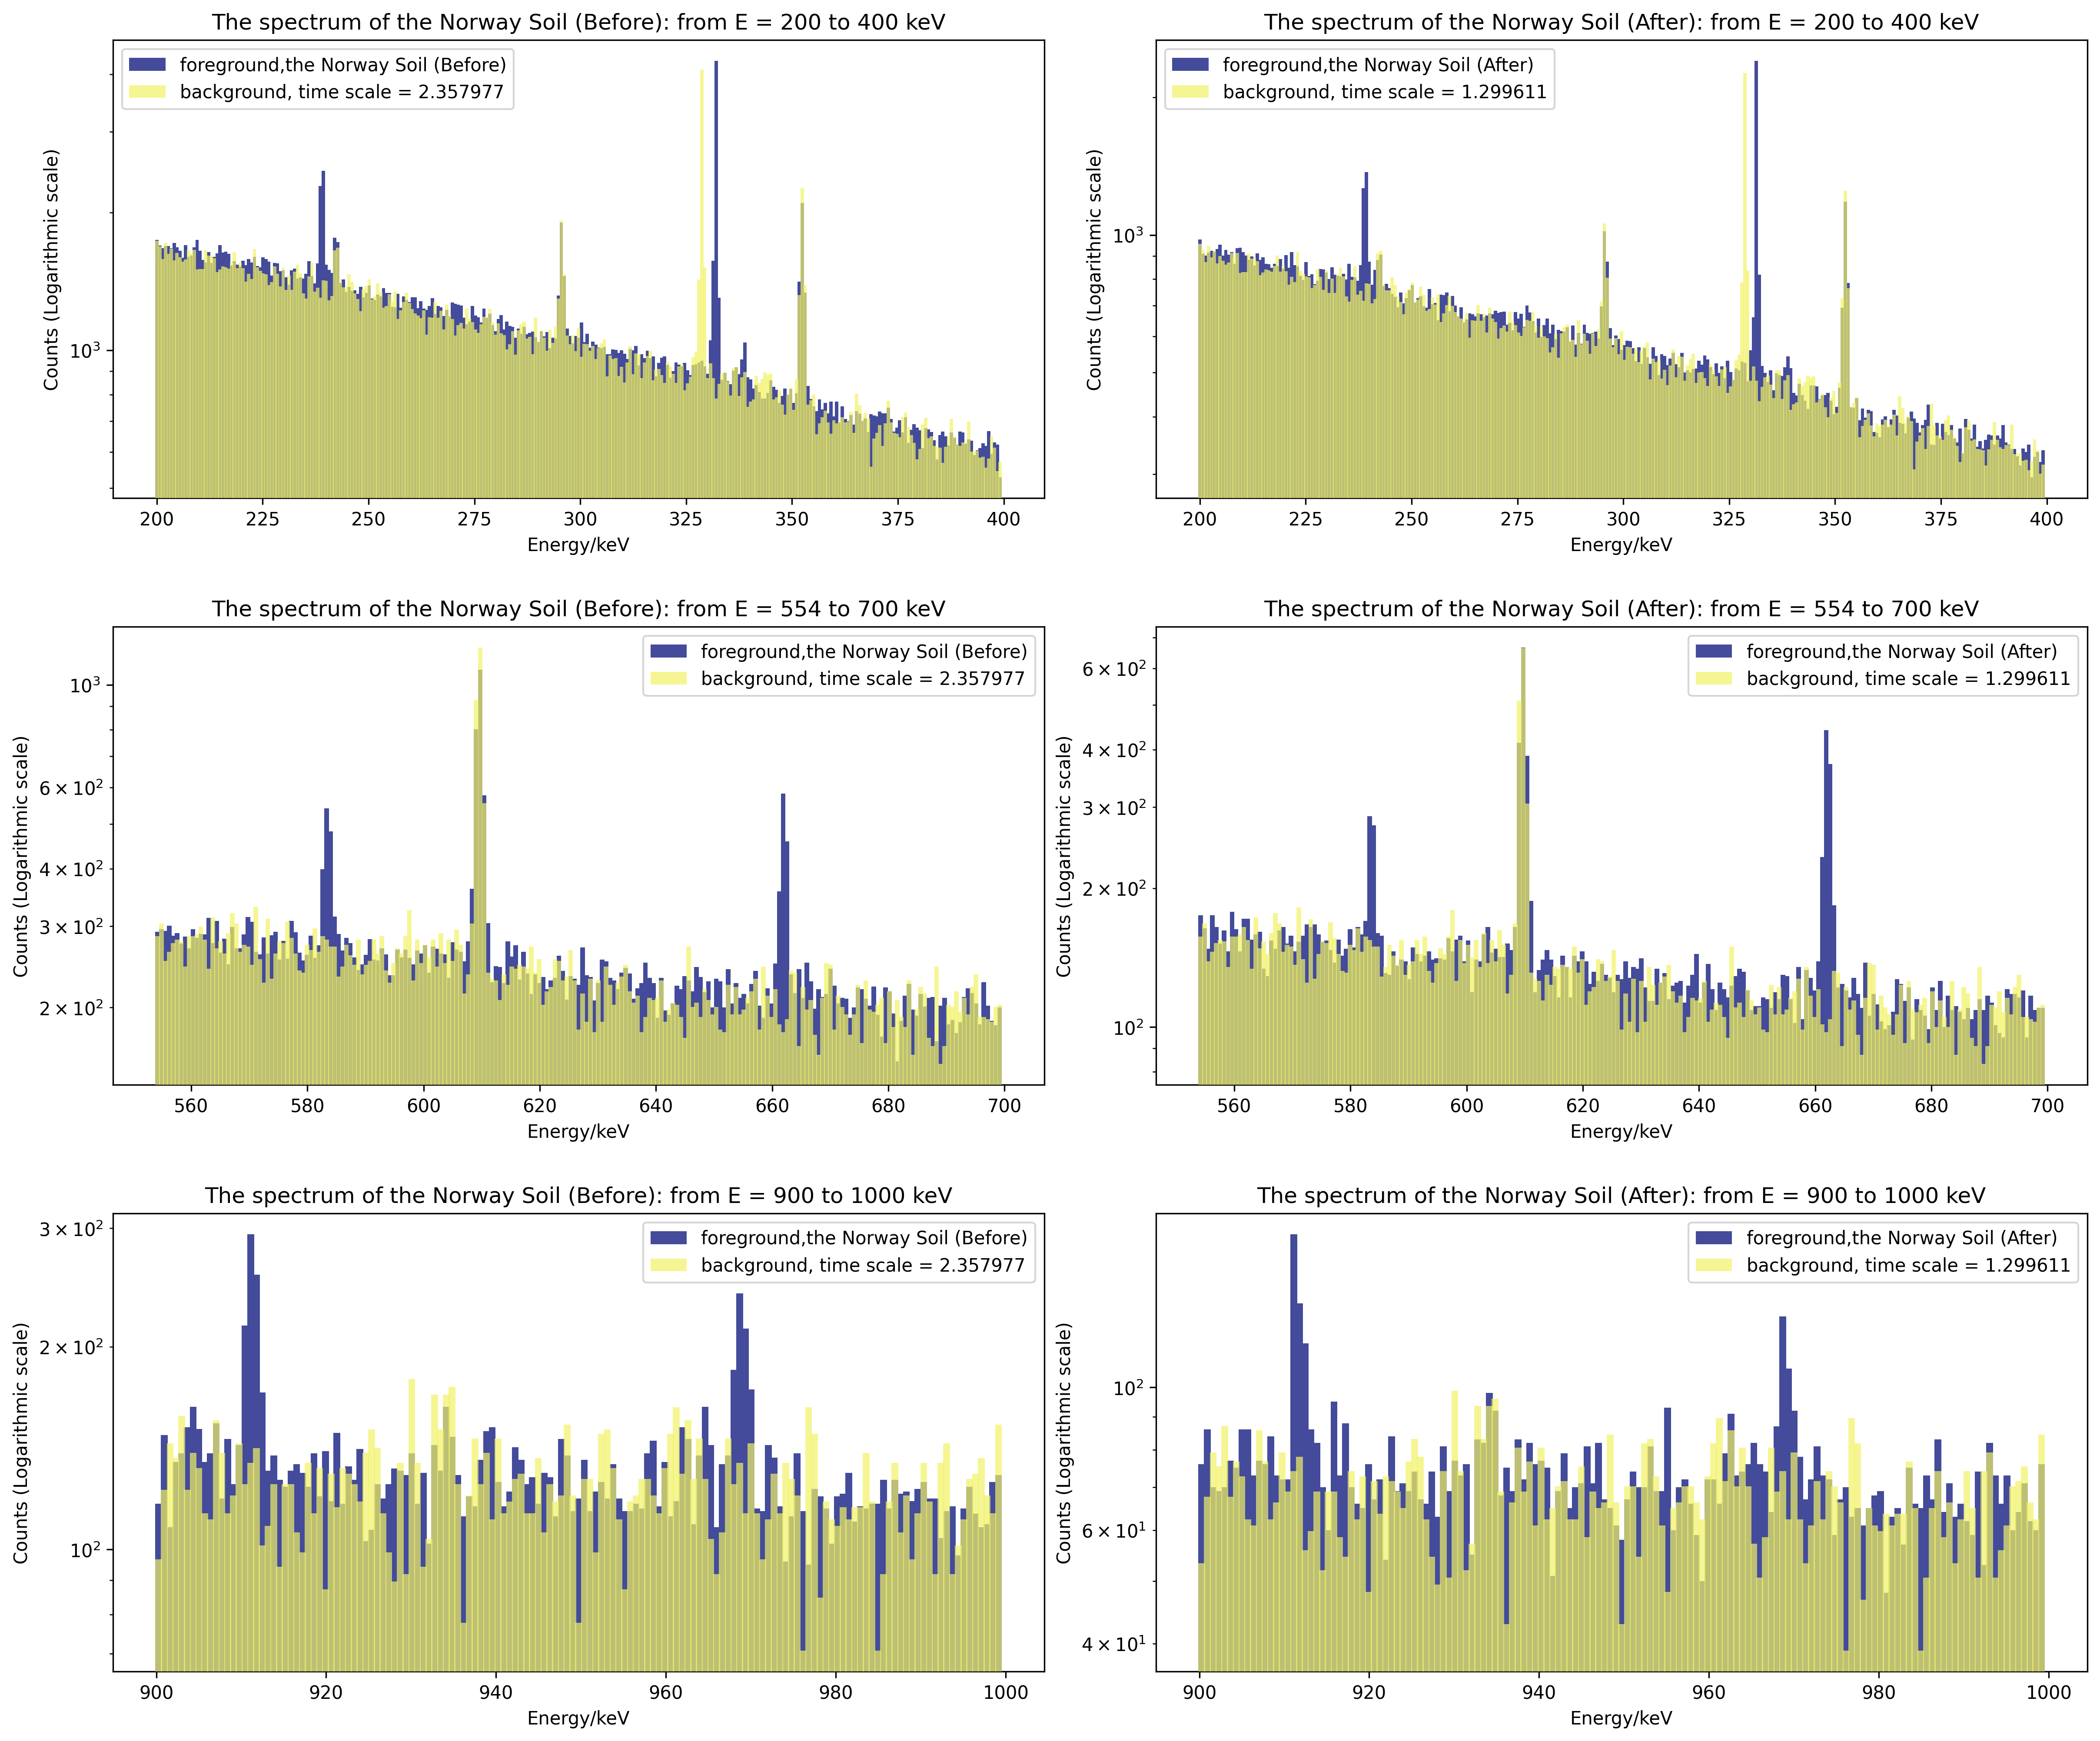

In [5]:
fig,ax = plt.subplots(3,2)
fig.tight_layout(pad = 0)
fig.set_size_inches(16, 13.5)

for i,p in enumerate([[N1,6.06E+05],[N2,3.34E+05]]):
    N = p[0]
    live = p[1]
    N.spectra(200,400,axs = ax[0,i],log=True,bkg=True,timescale= live/2.57E+05,bkgalpha=0.7)
    N.spectra(554,700,axs = ax[1,i],log=True,bkg=True,timescale= live/2.57E+05,bkgalpha=0.7)
    N.spectra(900,1000,axs = ax[2,i],log=True,bkg=True,timescale= live/2.57E+05,bkgalpha=0.7)

Photopeaks of the Norway Soil (After)
peak1 = 239.042519+- 0.041502

peak2 = 331.472613+- 0.014901

peak3 = 583.641318+- 0.039238

peak4 = 662.113657+- 0.033287

peak5 = 911.549160+- 0.125491

peak6 = 968.956929+- 0.100157



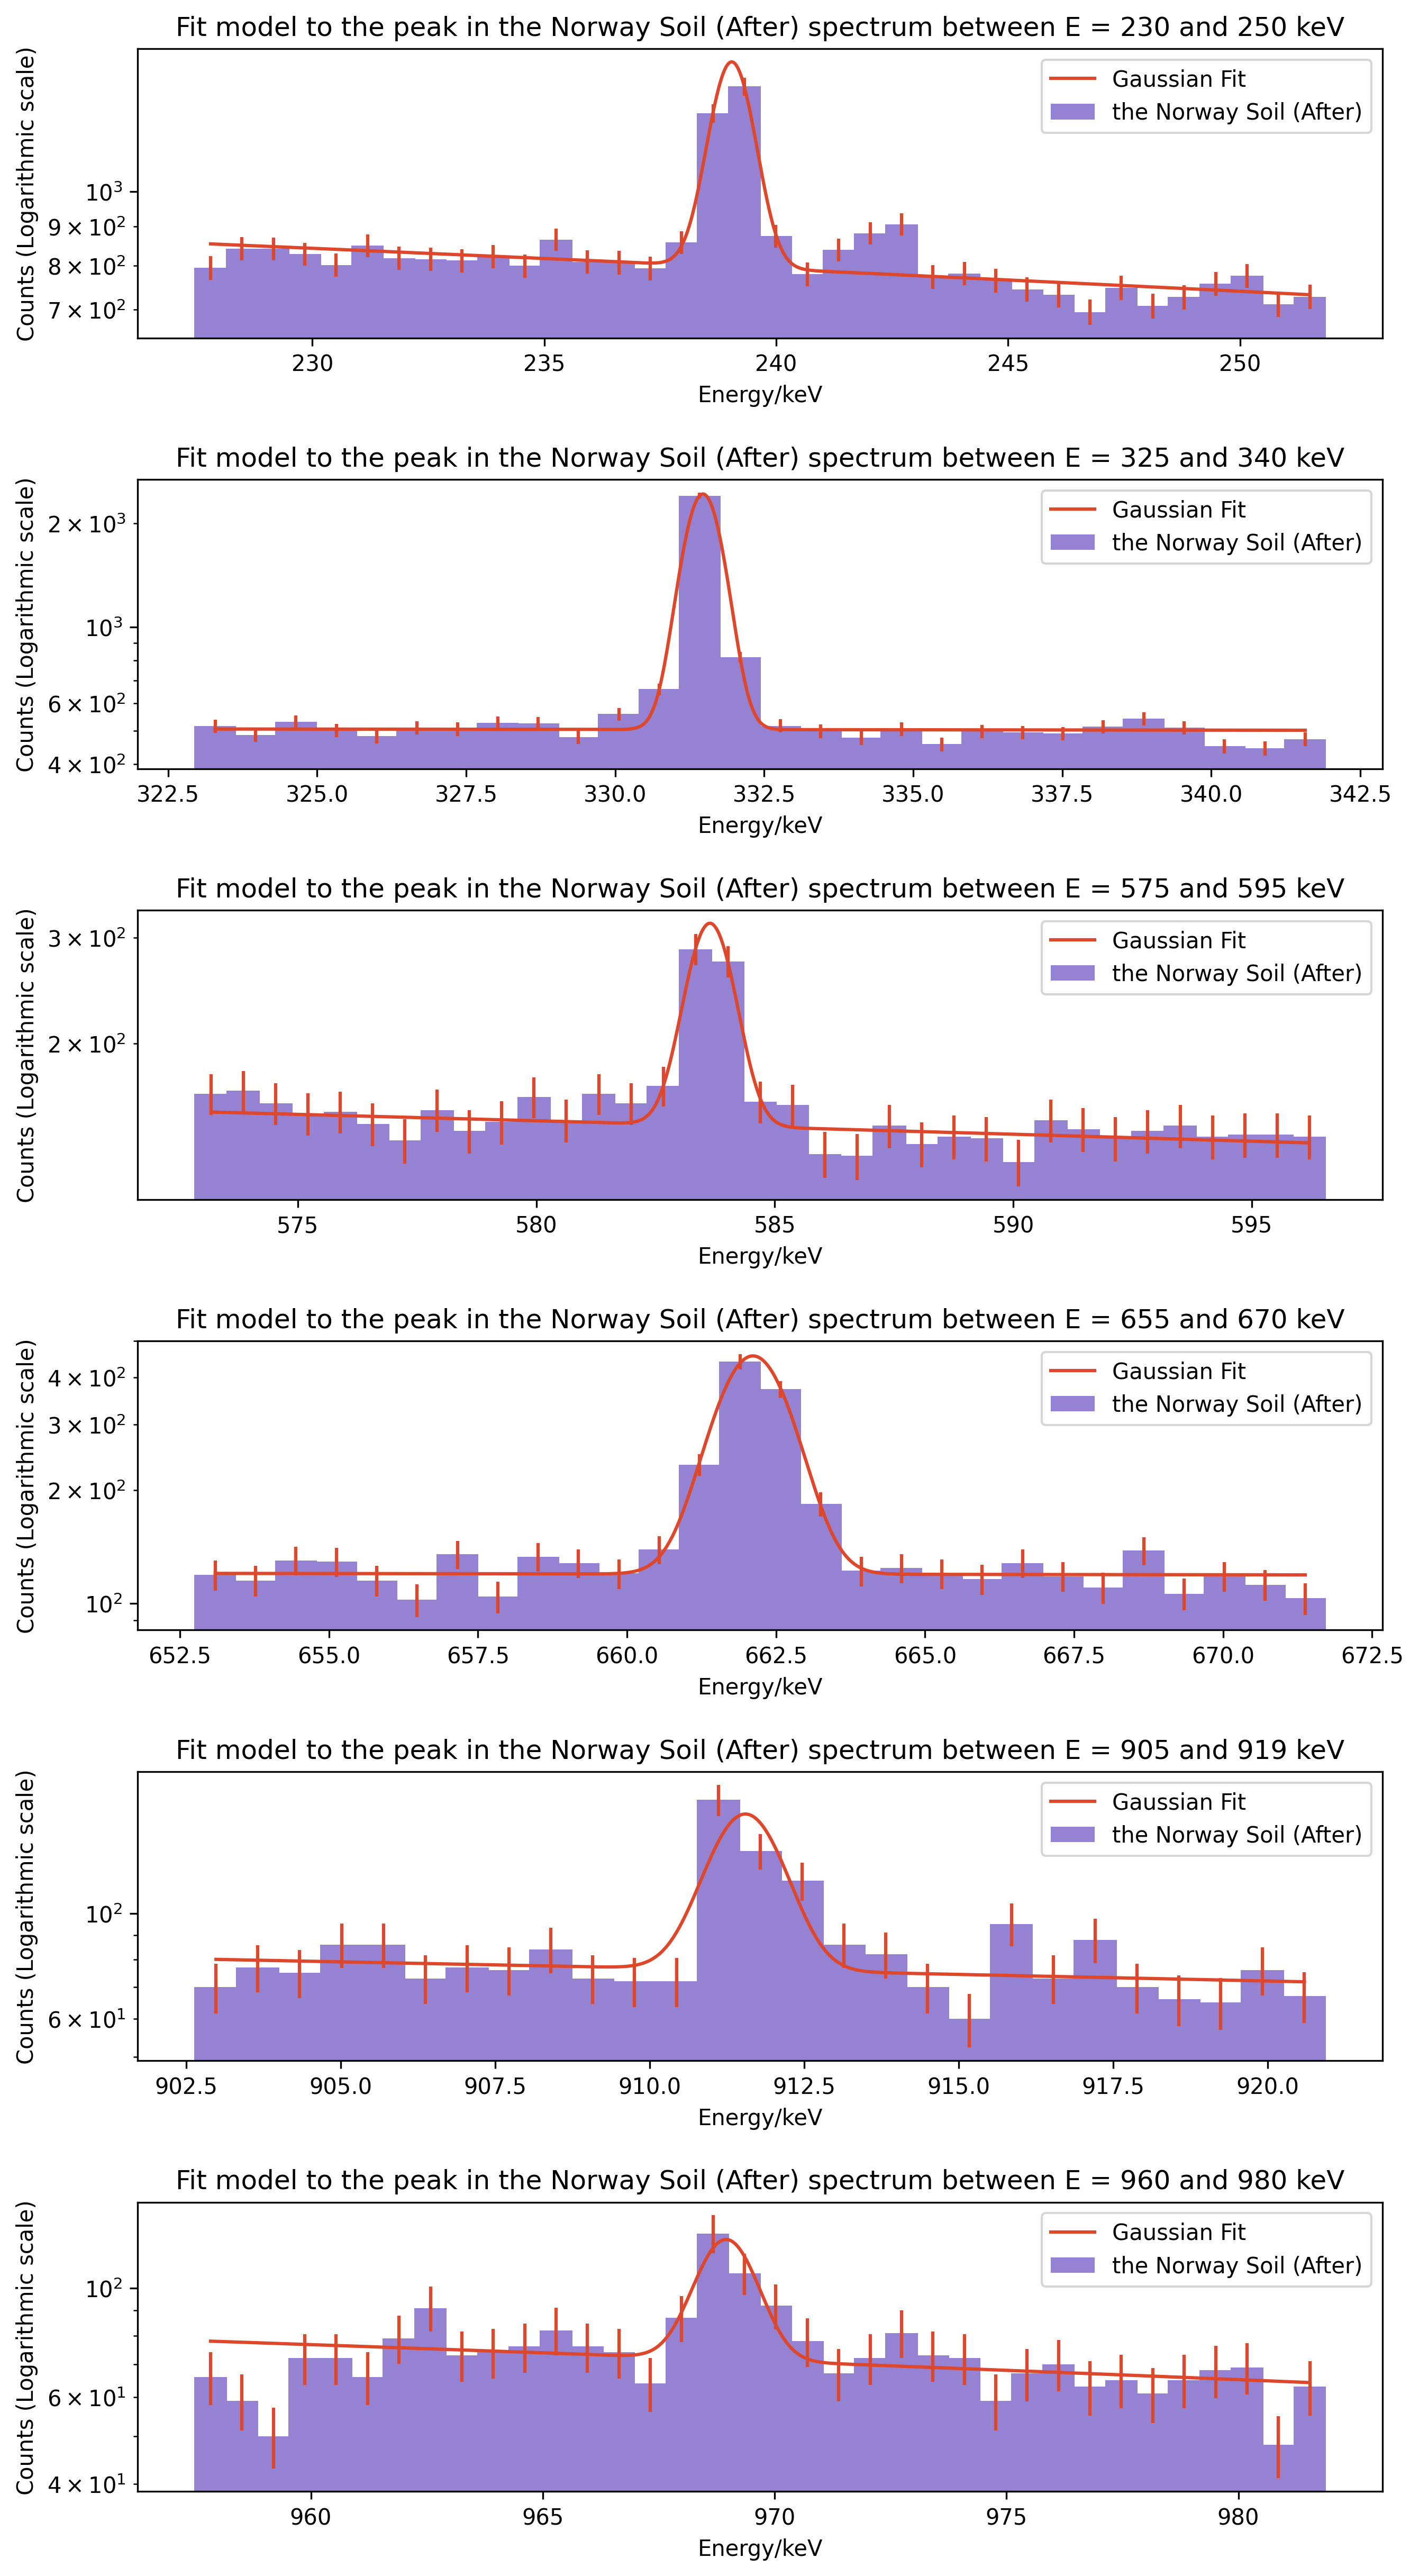

In [6]:
fig,ax = plt.subplots(6)
fig.tight_layout(pad = -0.5)
fig.set_size_inches(8,16)

p = np.zeros([6,2])

for i,x in enumerate([[230,250],[325,340],[575,595],[655,670],[905,919],[960,980]]):
    p[i]=N2.fit_peak(*x,axs = ax[i],plot= True,width = 0.7,peakonly=True)

N2.clear_peaks()
N2.add_peaks(p)
N2.print_peaks()

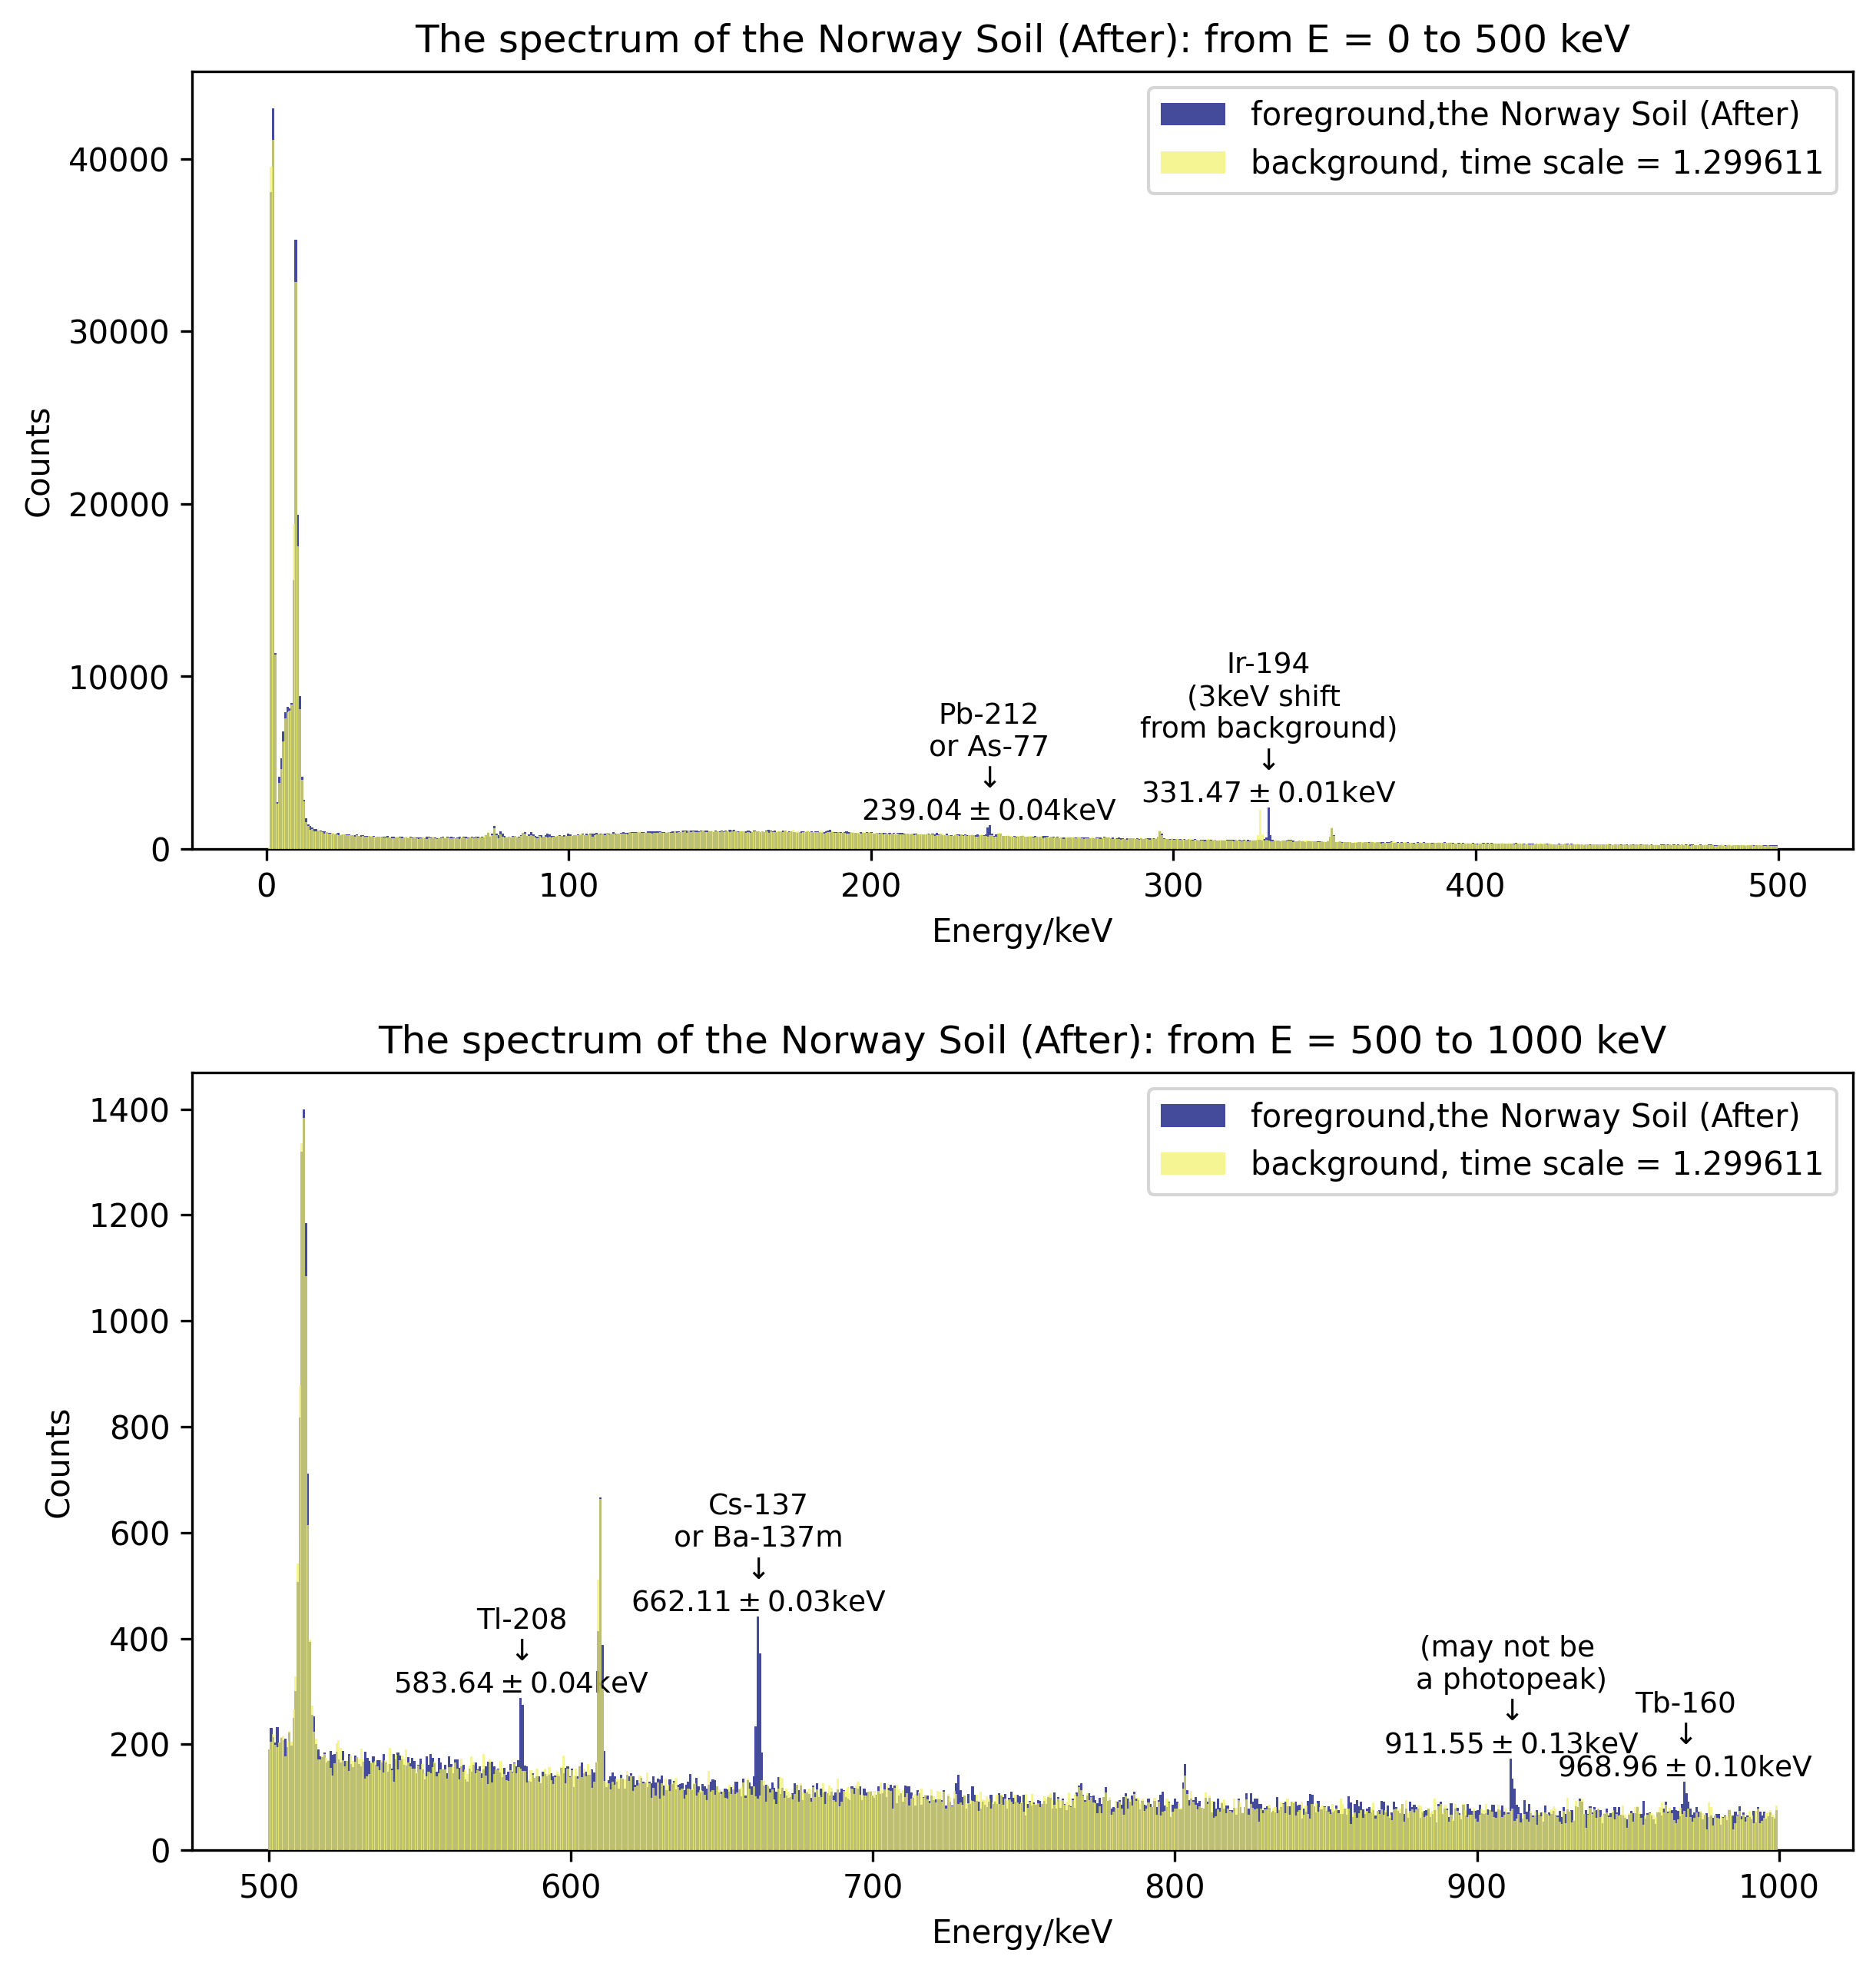

In [11]:
fig,ax = plt.subplots(2)
fig.tight_layout(pad = 1)
fig.set_size_inches(8,9)

Isotopes = ["Pb-212\nor As-77\n↓","Ir-194\n(3keV shift \nfrom background)\n↓","Tl-208\n↓","Cs-137\nor Ba-137m\n↓","(may not be \na photopeak)\n↓","Tb-160\n↓"]

N2.spectra(0,500,axs = ax[0],log=False,bkg=True,timescale= 3.34E+05/2.57E+05,bkgalpha=0.7)
N2.label_peaks(n2 = 2,axs = ax[0],fontsize=9,E_err = False,label=Isotopes)

N2.spectra(500,1000,axs = ax[1],log=False,bkg=True,timescale= 3.34E+05/2.57E+05,bkgalpha=0.7)
N2.label_peaks(n1 = 2,n2 = 6,axs = ax[1],fontsize=9,E_err = False,label=Isotopes)
